In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('/content/Students_Performance.csv')

In [25]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [ ]:
data.isnull().sum()


Male      518
Female    482
dtype: int64

**1. Find out how many males and females participated in the test**

In [ ]:
df_gen = data.groupby('gender')
df_gen['gender'].count()

gender
female    518
male      482
Name: gender, dtype: int64

**2. What do you think about the students' parental level of education?**


In [ ]:
#data['parental level of education'].unique()
df_parenteducation = data.groupby('parental level of education')
df_parenteducation['parental level of education'].count().sort_values(ascending=False)
#level = df_parenteducation['parental level of education'].count().sort_values().tail(1).index[0]
#level


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0, 0.5, 'Count')

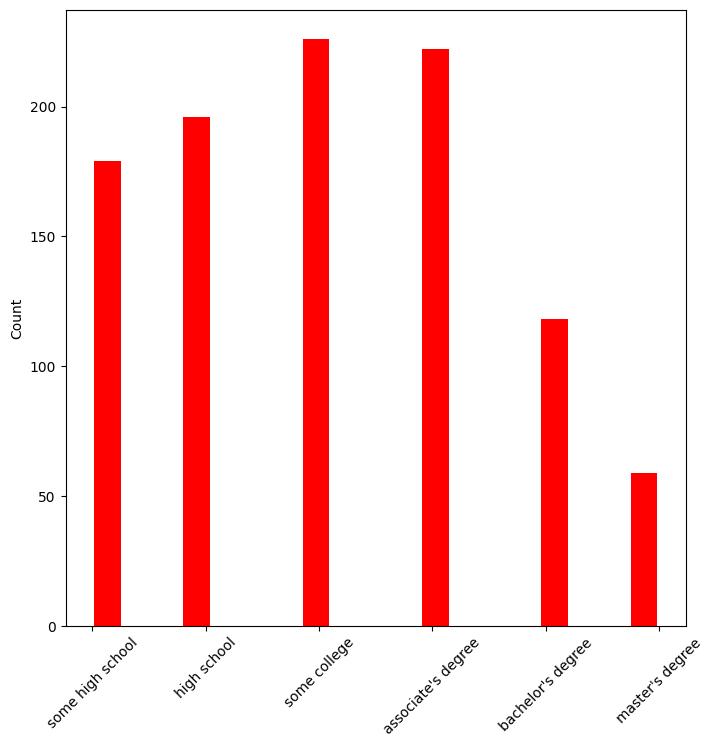

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(data['parental level of education'],color='red' ,rwidth=0.9,bins=19)
plt.xticks(rotation = 45)
plt.ylabel('Count')


**As per the graph and data, Most of the parents(226) have gone to college and only few parents have got their Master's degree**



**3. Who scores the most on average for math, reading and writing based on**




**a)Gender**


In [ ]:
val = df_gen['math score'].mean()+df_gen['writing score'].mean()+df_gen['reading score'].mean()
val = pd.DataFrame(val)
female = val.iloc[0,0]
male = val.iloc[1,0]
if female > male:
  print('Females scores the most on average for math, reading and writing ')
else:
  print('Males scores the most on average for math, reading and writing ')

Females scores the most on average for math, reading and writing 


In [ ]:
df_prep = data.groupby('test preparation course')
df_prep['math score'].mean()+df_prep['writing score'].mean()+df_gen['reading score'].mean()
completed = val.iloc[0,0]
non = val.iloc[1,0]
if completed > non:
  print('Those who completed the course scored the most on average for math, reading and writing ')
else:
  print('Those who didnt have test preparation scored the most on average for math, reading and writing ')

Those who completed the course scored the most on average for math, reading and writing 


**4. What do you think about the scoring variation for math, reading and writing based on**

In [ ]:
female = data[data.gender == 'female']
male = data[data.gender == 'male']

**a)Gender**

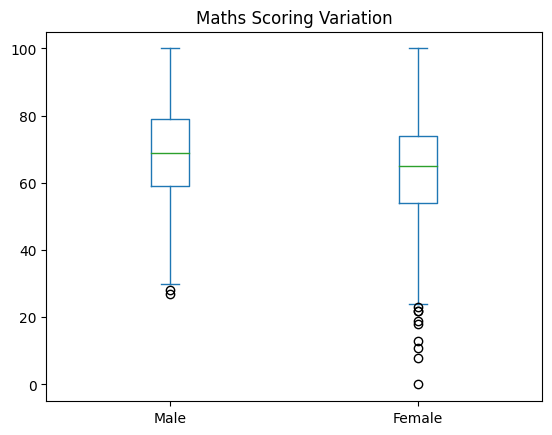

In [ ]:
import seaborn as sns

data = pd.DataFrame({"Male": male['math score'], "Female": female['math score']})
ax = data[['Male', 'Female']].plot(kind='box', title='Maths Scoring Variation')
plt.show()


**INSIGHTS ON VARIATION IN MATHS SCORES AMONG MALES AND FEMALES**

a)Male students have a slightly higher Mean Average of scores than females

b)The variation in scores between female students is higher than in males.



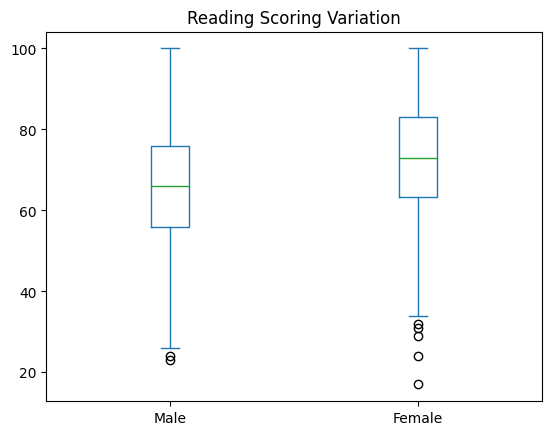

**INSIGHTS ON THE READING SCORE VARIATION**

a)The Mean Reading Average score of Female Students is higher than male students

b) The variation in reading scores is higher in males.

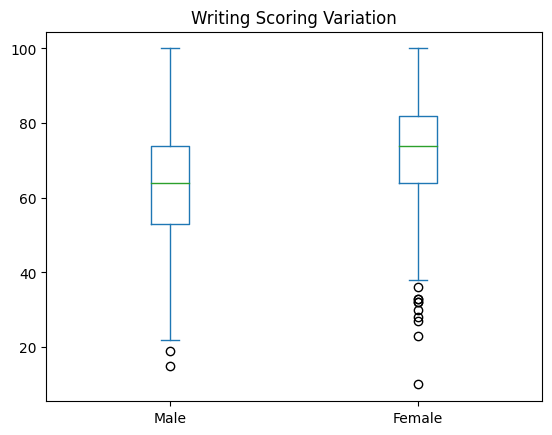

In [ ]:
data = pd.DataFrame({"Male": male['writing score'], "Female": female['writing score']})
ax = data[['Male', 'Female']].plot(kind='box', title='Writing Scoring Variation')
plt.show()

**INSIGHTS ON THE WRITING SCORE VARIATION**

a)The Mean Reading Average score of Female Students is higher than male students

b) The variation in writing scores is higher in males.

**b) Based on Test preparation course**

In [29]:
none = data[data['test preparation course'] == 'none']
completed = data[data['test preparation course'] == 'completed']

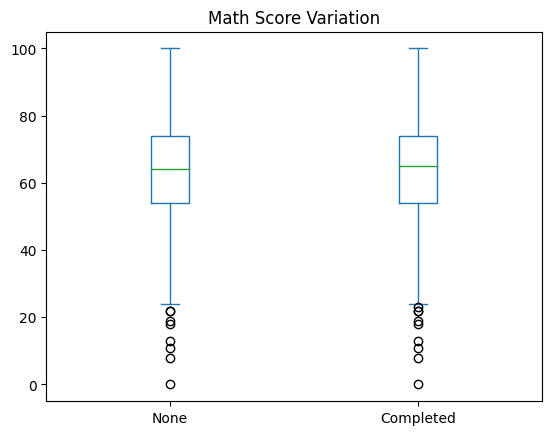

In [41]:

data = pd.DataFrame({"None": none['math score'], "Completed": female['math score']})
ax = data[['None', 'Completed']].plot(kind='box', title='Math Score Variation')


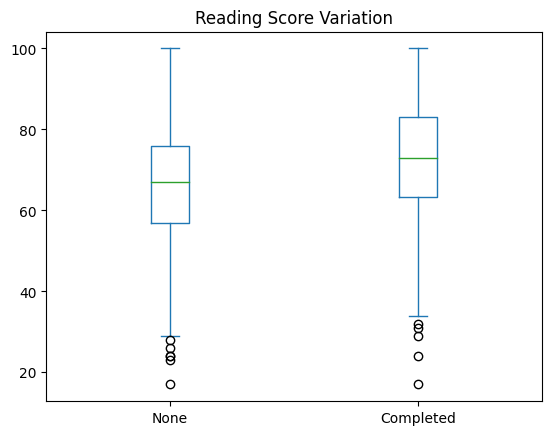

In [40]:

data = pd.DataFrame({"None": none['reading score'], "Completed": female['reading score']})
ax = data[['None', 'Completed']].plot(kind='box', title='Reading Score Variation')

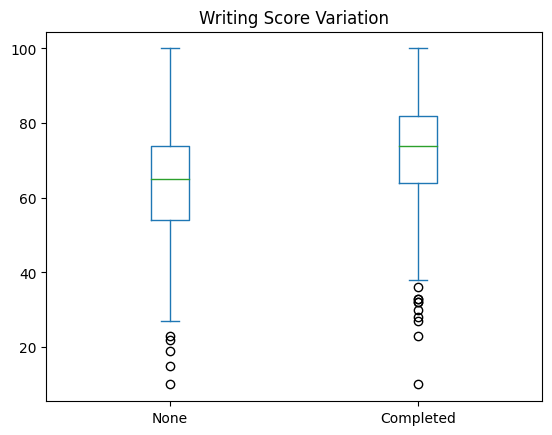

In [39]:
data = pd.DataFrame({"None": none['writing score'], "Completed": female['writing score']})
ax = data[['None', 'Completed']].plot(kind='box', title='Writing Score Variation')

**INSIGHTS:**
1)There is marginal difference in the Maths scores between students who completed the test preparation Course and those who did not.

2)Students who completed the test preparation course have a higher mean average in reading and writing score than the those who didnt complete the test preparation course

**5. The management needs your help to give bonus points**
**to the top 25% of students based on their math score,**
**so how will you help the management to achieve this.**

In [9]:
q75 = data['math score'].quantile(q=0.75)
data[data['math score'].ge(q75)]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [36]:
df = pd.read_csv('/content/Sales_add.csv')

In [ ]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [ ]:
df.shape

(22, 5)

**Q2 a)The company wishes to clarify whether there is any**
**increase in sales after stepping into digital marketing**

In [30]:
#Ho There is no increase in sales after digital marketing
#Ha There is an increase in sales after digital marketing
import pandas as pd
from scipy import stats
a = df['Sales_before_digital_add(in $)']
b = df['Sales_After_digital_add(in $)']
t_stat, p_val = stats.ttest_ind(a,b)
alpha = 0.05
if p_val < alpha:
  print('Reject null Hypothesis. Thus, There is an increase in sales after digital marketing')
else:
  print('There is no increase in sales after digital marketing')

Reject null Hypothesis. Thus, There is an increase in sales after digital marketing


**b. The company needs to check whether there is any**
**dependency between the features “Region” and**
**“Manager”**

In [60]:
#Region and Manager are indepenent variables and the Sales is the dependent variable
# H0 : There is no significant difference between the means.No relation between Region and Manager on the Sales
# Ha : There is dependency with  Region and Manager on the Sales
import statsmodels.api as sm
from statsmodels.formula.api import ols
alpha=0.05
colname = df['Sales_After_digital_add(in $)']
model = ols('colname ~ C(Region)+C(Manager)+C(Region):C(Manager)',data=df).fit()
anova_table = sm.stats.anova_lm(model,typ = 2)
if anova_table['PR(>F)'][0]<alpha:
  print('Reject Null Hypothesis. There is effect of Region on the Sales')
else:
  print('There is No dependency of Region on the Sales')
if anova_table['PR(>F)'][1]<alpha:
 print('Reject Null Hypothesis. There is effect of Manager on the Sales')
else:
  print('There is No dependency of Manager on the Sales')
if anova_table['PR(>F)'][2]<alpha:
 print('Reject Null Hypothesis. There is effect of Region and  Manager on the Sales')
else:
  print('There is No dependency of Region and Manager together on the Sales')

There is No dependency of Region on the Sales
There is No dependency of Manager on the Sales
There is No dependency of Region and Manager together on the Sales
